In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Criando geradores de imagem
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # Normalizando as imagens e dividindo em treino e validação

# Criando um gerador para carregar, processar e dividir os dados de treinamento
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Visão Computacional/Trabalho Bimestral - 5,0/Fruit-262', 
    target_size=(32, 32),
    batch_size=16,  # Reduzindo o batch size para 16
    class_mode='sparse',
    subset='training') # Conjunto de treinamento

# Criando um gerador para carregar, processar e dividir os dados de validação
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Visão Computacional/Trabalho Bimestral - 5,0/Fruit-262', 
    target_size=(32, 32),
    batch_size=16,  # Reduzindo o batch size para 16
    class_mode='sparse',
    subset='validation') # Conjunto de validação

# Criando um bloco de identidade
def identity_block(X, f, filters):
    F1, F2, F3 = filters
    X_shortcut = X

    # Caminho principal
    X = layers.Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.Activation('relu')(X)

    X = layers.Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.Activation('relu')(X)

    X = layers.Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = layers.BatchNormalization(axis=3)(X)

    # Atalho
    X_shortcut = layers.Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X_shortcut)
    X_shortcut = layers.BatchNormalization(axis=3)(X_shortcut)

    # Adicionando o atalho ao caminho principal
    X = layers.Add()([X, X_shortcut])
    X = layers.Activation('relu')(X)

    return X


# Criando o modelo
inputs = tf.keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (7, 7), strides=(2, 2))(inputs)
x = layers.BatchNormalization(axis=3)(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

# Adicionando blocos de identidade
x = identity_block(x, 3, [32, 32, 128])  # Reduzido os filtros pela metade
x = identity_block(x, 3, [32, 32, 128])  # Reduzido os filtros pela metade

x = layers.Flatten()(x)
x = layers.Dense(10, activation='softmax')(x)

# Completando a construção do modelo
model = tf.keras.Model(inputs=inputs, outputs=x)

# Compilando o modelo com o otimizador Adam, usando Sparse Categorical Crossentropy como função de perda e rastreando a acurácia
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Treinando o modelo
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 7802 images belonging to 10 classes.
Found 1947 images belonging to 10 classes.
Epoch 1/10
488/488 [==============================] - 1390s 3s/step - loss: 1.6912 - accuracy: 0.4535 - val_loss: 1.5700 - val_accuracy: 0.4782
Epoch 2/10
488/488 [==============================] - 47s 97ms/step - loss: 1.1054 - accuracy: 0.6256 - val_loss: 1.5854 - val_accuracy: 0.5162
Epoch 3/10
488/488 [==============================] - 47s 97ms/step - loss: 0.8645 - accuracy: 0.7069 - val_loss: 1.4026 - val_accuracy: 0.5285
Epoch 4/10
488/488 [==============================] - 53s 109ms/step - loss: 0.7417 - accuracy: 0.7463 - val_loss: 1.8313 - val_accuracy: 0.4633
Epoch 5/10
488/488 [==============================] - 47s 96ms/step - loss: 0.6320 - accuracy: 0.7816 - val_loss: 1.1246 - val_accuracy: 0.6466
Epoch 6/10
488/488 [==============================] - 50s 102ms/

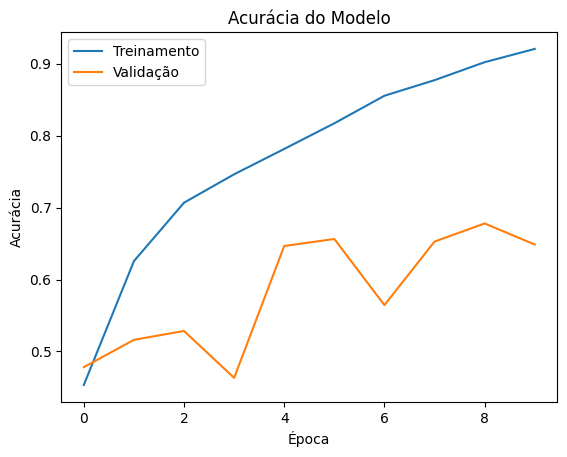

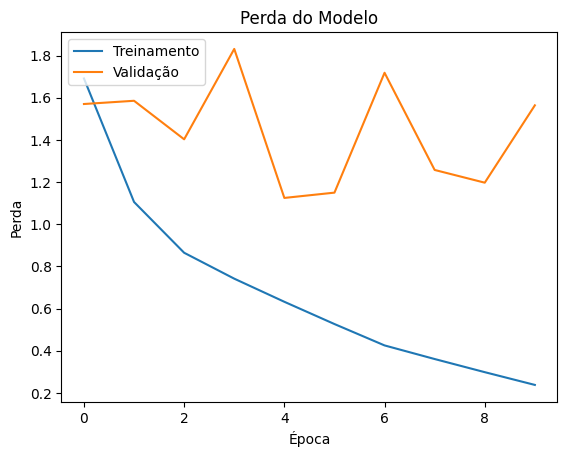

In [7]:
import matplotlib.pyplot as plt

# Gráfico de acurácia - mostra como a acurácia do modelo muda ao longo das épocas de treinamento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()

# Gráfico de perda - mostra como a perda do modelo muda ao longo das épocas de treinamento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()